In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/customer_churn_data.csv")

In [3]:
# BEGIN DATA CLEANING

In [4]:
# HANDLE MISSING VALUES
data.isna().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
# CHECK FOR DUPLICATED ROWS

data.duplicated().sum()

np.int64(0)

In [6]:
# INTERNET SERVICE HAS SOME MISSING VALUES. REPLACE WITH EMPTY STRING.
data['InternetService'] = data['InternetService'].fillna("")
data.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [7]:
# TO GET AN UNDERSTANDING OF THE DATA.
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [8]:
# TO GET AN UNDERSTANDING OF THE DATA.
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [9]:
# TO GET AN UNDERSTANDING OF THE DATA.
data.select_dtypes(include=['number']).corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


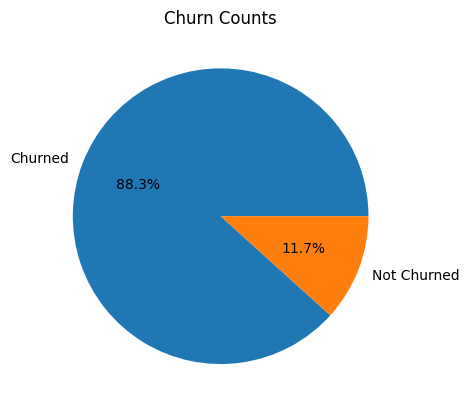

In [10]:
# TO GET AN UNDERSTANDING OF THE DATA.
# FIND HOW MANY PEOPLE ARE CHURNING.

churn_yes = data[data['Churn'] == 'Yes']['Churn'].count()
churn_no = data[data['Churn'] == 'No']['Churn'].count()

plt.title('Churn Counts')
plt.pie([churn_yes, churn_no], labels=['Churned', 'Not Churned'], autopct='%1.1f%%')
plt.show()

In [11]:
# TO GET AN UNDERSTANDING OF THE DATA.
data.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [12]:
# TO GET AN UNDERSTANDING OF THE DATA.
data.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [13]:
# TO GET AN UNDERSTANDING OF THE DATA.
data.groupby(["Churn", "Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

([0, 1], [Text(0, 0, 'One-Year'), Text(1, 0, 'Two-Year')])

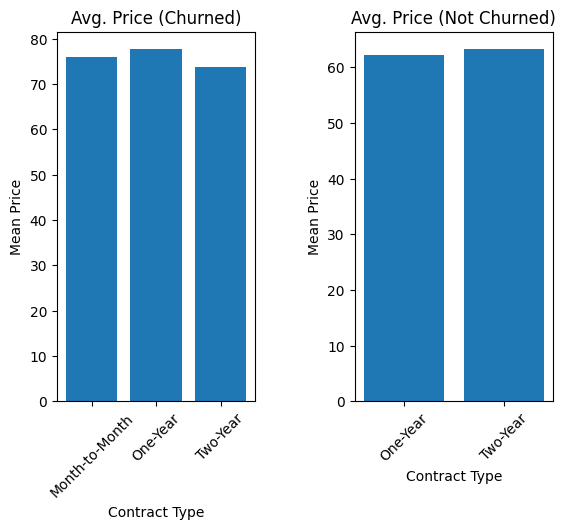

In [14]:
# TO GET AN UNDERSTANDING OF THE DATA.

data_churned = data[data['Churn'] == 'Yes']
data_churned_monthly_charges = data_churned.groupby('ContractType')['MonthlyCharges'].mean()
data_not_churned = data[data['Churn'] == 'No']
data_not_churned_monthly_charges = data_not_churned.groupby('ContractType')['MonthlyCharges'].mean()


plt.subplot(1, 2, 1,)
plt.title('Avg. Price (Churned)')
plt.bar(data_churned_monthly_charges.index, data_churned_monthly_charges.values)
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.subplots_adjust(wspace=0.5)
plt.xticks(rotation=45) 

plt.subplot(1, 2, 2)
plt.title('Avg. Price (Not Churned)')
plt.bar(data_not_churned_monthly_charges.index, data_not_churned_monthly_charges.values)
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.subplots_adjust(wspace=0.5)
plt.xticks(rotation=45) 



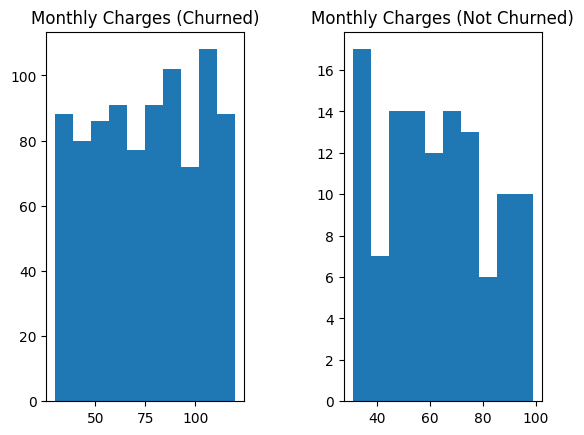

In [15]:
plt.subplot(1, 2, 1,)
plt.hist(data_churned["MonthlyCharges"])
plt.title("Monthly Charges (Churned)")
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.hist(data_not_churned["MonthlyCharges"])
plt.title("Monthly Charges (Not Churned)")
plt.subplots_adjust(wspace=0.5)


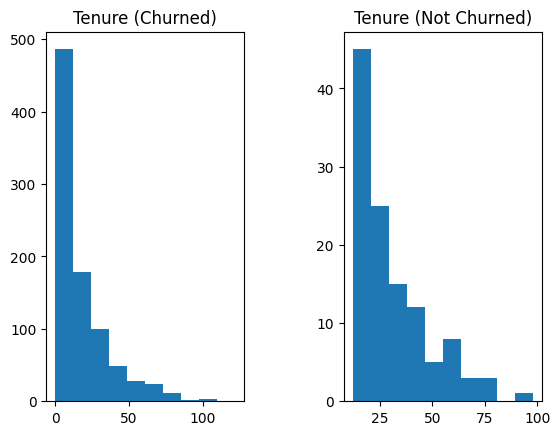

In [16]:
plt.subplot(1, 2, 1,)
plt.hist(data_churned["Tenure"])
plt.title("Tenure (Churned)")
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
plt.hist(data_not_churned["Tenure"])
plt.title("Tenure (Not Churned)")
plt.subplots_adjust(wspace=0.5)

In [17]:
# BEGIN TO PREPROCESS DATA
# note: X IS A REFERENCE TO DATA, WHEN X IS CHANGED, IS DATA CHANGED OR JUST X? THIS UNCERTAINTY IS ACKNOWLEDGED BY THE INTERPRETOR SO WE GET A WARNING.
# note: FIX BY CREATING AN EXPLICIT COPY
X = data[["Age", "Gender", "Tenure", "MonthlyCharges"]].copy()
y = data["Churn"].copy()

In [18]:
# REPLACE GENDER STRING VALUES WITH INTEGER VALUES FOR OUR ML MODEL
X["Gender"] = X["Gender"].map({'Male': 0, 'Female': 1})

In [19]:
# REPLACE STRING CHURN OUTPUTS WITH INTEGER VALUES FOR OUR ML MODEL
y = y.map({"Yes": 1, "No": 0})

In [20]:
# SPLIT THE DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
# SCALE THE INPUT TRAINING AND TESTING DATA
# note: THE OUTPUT DATA IS ALREADY MODEL-FRIENDLY

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
# SAVE PICKLED OBJECT TO NOT HAVE TO RE-TRAIN MODEL
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [23]:
# CREATE PERFORMANCE BENCHMARKS

from sklearn.metrics import accuracy_score
def model_performance(predictions):
    score = accuracy_score(y_test, predictions)
    print(f"The Accuracy Score on the Model is {score}")

In [24]:
# MODEL TRAINING: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

joblib.dump(logistic_model, "logistic_model.pkl")
model_performance(logistic_model.predict(X_test))

The Accuracy Score on the Model is 0.87


In [25]:
# MODEL TRAINING: KNEIGHBORSCLASSIFIER
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
parameter_grid = {
    "n_neighbors": [3,5,7,9], # Define K
    "weights": ["uniform", "distance"], # Each Neighbor Has Equal Influence
    "metric": ["euclidean", "manhattan", "minkowski"]  # Distance Metric
}
grid_knn = GridSearchCV(knn_model, parameter_grid, cv = 5)
grid_knn.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)

joblib.dump(grid_knn, "knn_model.pkl")
model_performance(grid_knn.predict(X_test))

The Accuracy Score on the Model is 0.865


In [26]:
# MODEL TRAINING: RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
parameter_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap" : [True, False]
}
grid_rfc = GridSearchCV(rfc_model, parameter_grid, cv = 5)
grid_rfc.fit(X_train, y_train)
# grid_rfc.best_params_

joblib.dump(grid_rfc, "rfc_model.pkl")
model_performance(grid_rfc.predict(X_test))

The Accuracy Score on the Model is 0.875


In [27]:
# MODEL TRAINING: SUPPORT VECTOR CLASSIFIER (A TYPE OF SVM)
from sklearn.svm import SVC
svm_model = SVC()
parameter_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}
gridSVC = GridSearchCV(svm_model, parameter_grid, cv = 5)
gridSVC.fit(X_train, y_train)
# gridSVC.best_params_

joblib.dump(gridSVC, "svm_model.pkl")
model_performance(gridSVC.predict(X_test))

The Accuracy Score on the Model is 0.87


In [28]:
# MODEL TRAINING: DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
parameter_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}
grid_tree = GridSearchCV(dtc_model, parameter_grid, cv = 5)
grid_tree.fit(X_train, y_train)
# grid_tree.best_params_

joblib.dump(grid_tree, "dtc_model.pkl")
model_performance(grid_tree.predict(X_test))

The Accuracy Score on the Model is 0.82
